In [122]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [123]:
data = pd.read_csv('archive/cardekho.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


## Описание датасета
*Данные предоставляют информацию о проданных машинах (https://www.kaggle.com/datasets/sukhmandeepsinghbrar/car-price-prediction-dataset). К числовым признакам относятся: год производства (year), цена (selling_price), пробег (km_driven), крутящий момент двигателя (engine), мощность двигателя (max_power), посадочные места (seats). К категориальным признакам относятся: топливо (fuel), трансмиссия (transmission), количество владельцев (owner), тип сделки (seller_type).*

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


## Первичная визуализация и борьба с выбросами

In [125]:
data.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

<Axes: xlabel='km_driven', ylabel='selling_price'>

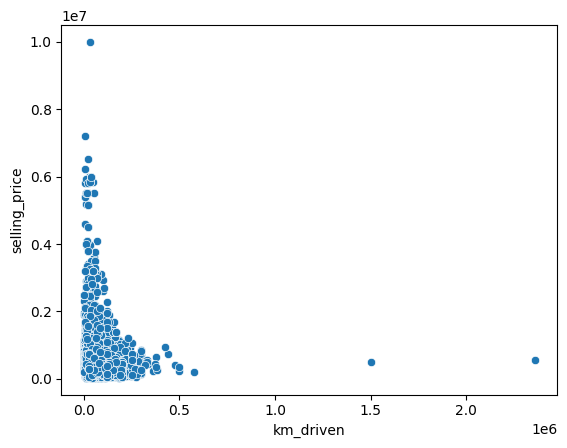

In [126]:
sb.scatterplot(data=data, x='km_driven', y='selling_price')

<Axes: xlabel='max_power', ylabel='selling_price'>

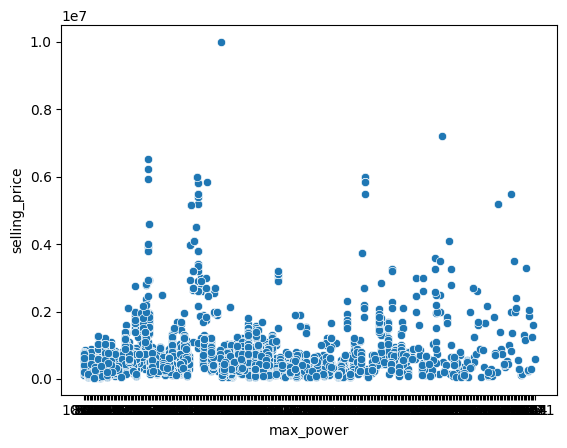

In [127]:
sb.scatterplot(data=data, x='max_power', y='selling_price')

<Axes: xlabel='engine', ylabel='selling_price'>

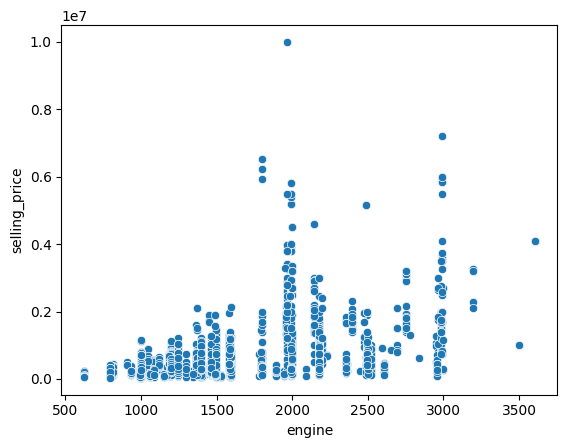

In [128]:
sb.scatterplot(data=data, x='engine', y='selling_price')

<Axes: xlabel='mileage(km/ltr/kg)', ylabel='selling_price'>

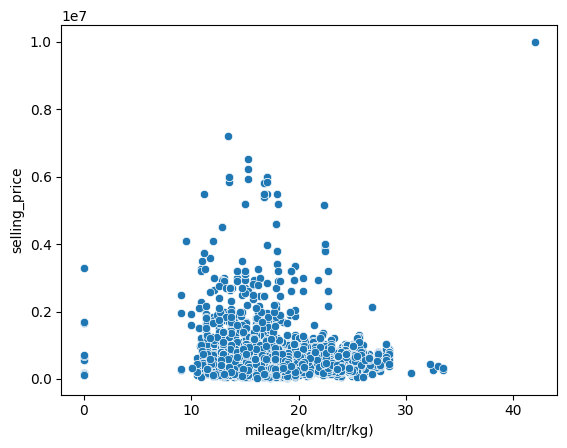

In [129]:
sb.scatterplot(data=data, x='mileage(km/ltr/kg)', y='selling_price')

<Axes: xlabel='transmission', ylabel='selling_price'>

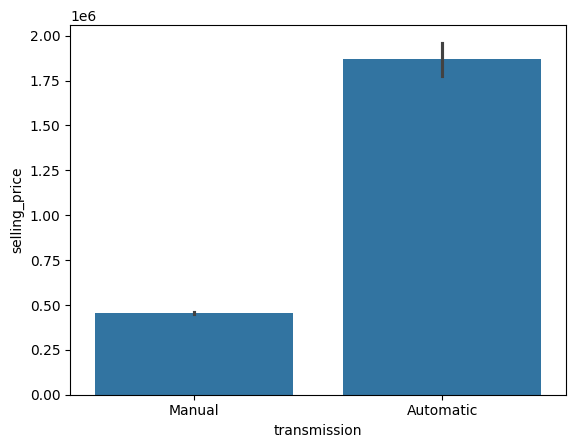

In [130]:
sb.barplot(data=data, x='transmission', y='selling_price')

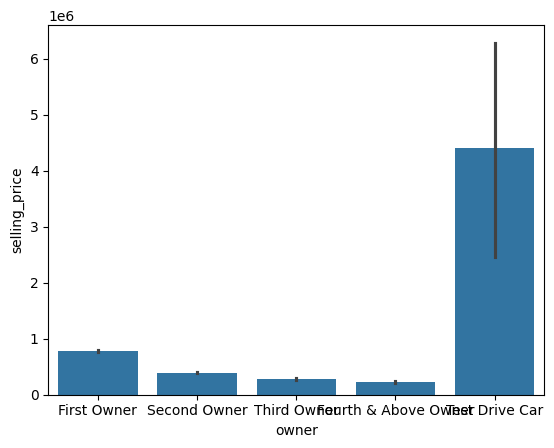

In [131]:
g = sb.barplot(data=data, x='owner', y='selling_price')

In [ ]:
data['max_power'] = pd.to_numeric(data['max_power'], errors='coerce')
data['max_power'].fillna(data['max_power'].mean(), inplace=True)

In [ ]:
data['seats'].fillna(data['seats'].mean(), inplace=True)
data['mileage(km/ltr/kg)'].fillna(data['mileage(km/ltr/kg)'].mean(), inplace=True)
data['engine'].fillna(data['engine'].mean(), inplace=True)

In [134]:
data.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           8128 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


<Axes: xlabel='seats', ylabel='selling_price'>

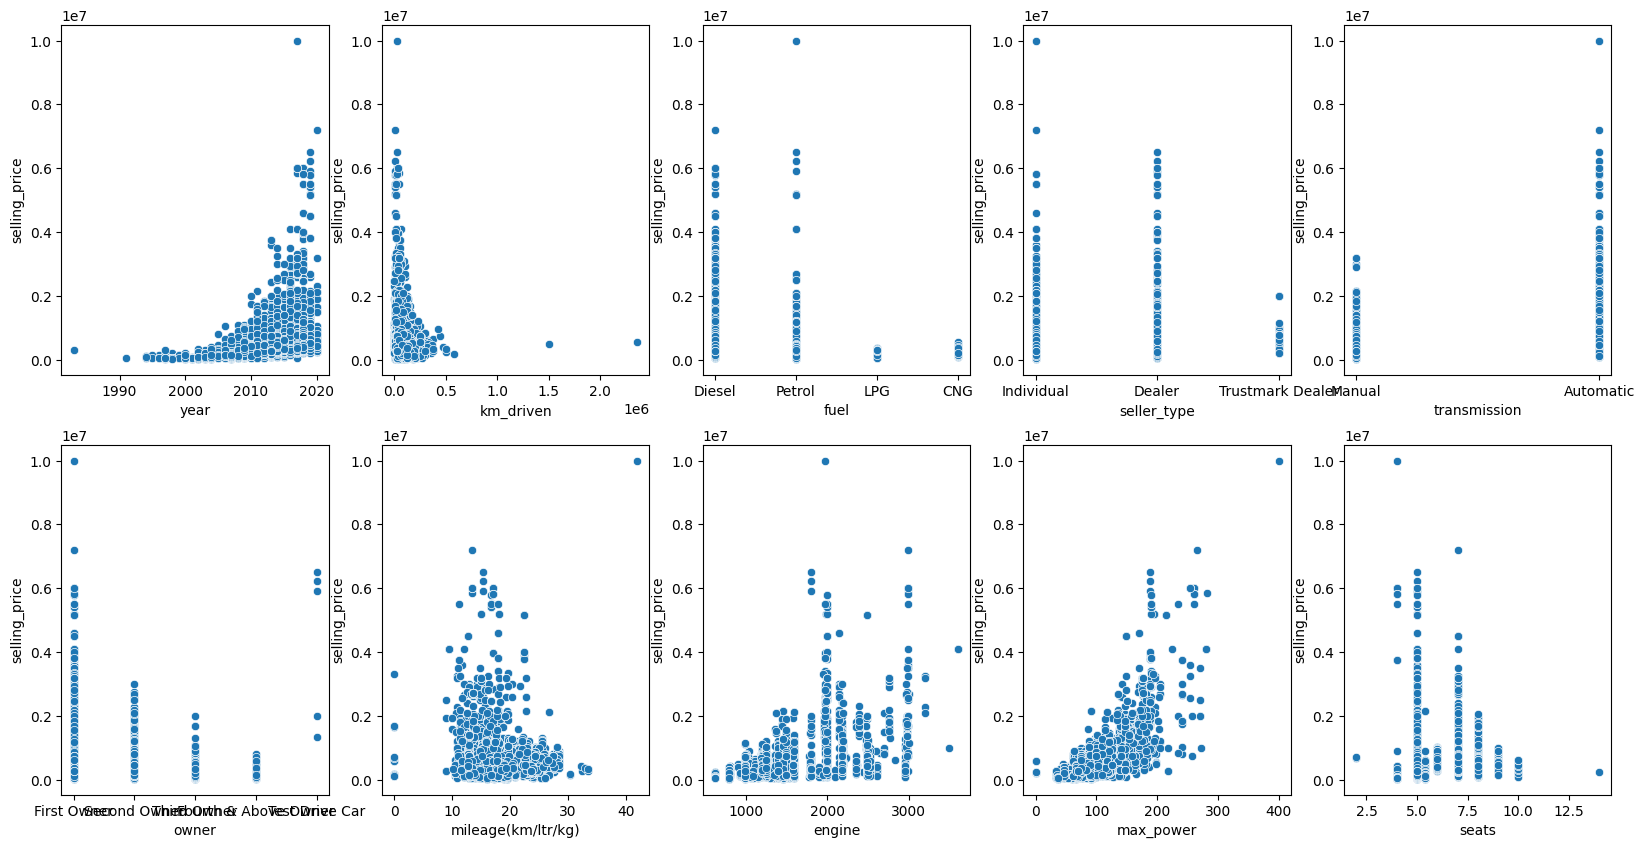

In [136]:
X = data.drop(['selling_price','name'], axis=1)
y = data['selling_price']
feature_names = X.columns
feature_names = list(feature_names)
fig, axs = plt.subplots(nrows=2, ncols=5)
fig.set_figheight(10)
fig.set_figwidth(20)
sb.scatterplot(x=feature_names[0], y='selling_price', data=data, ax=axs[0][0])
sb.scatterplot(x=feature_names[1], y='selling_price', data=data, ax=axs[0][1])
sb.scatterplot(x=feature_names[2], y='selling_price', data=data, ax=axs[0][2])
sb.scatterplot(x=feature_names[3], y='selling_price', data=data, ax=axs[0][3])
sb.scatterplot(x=feature_names[4], y='selling_price', data=data, ax=axs[0][4])
sb.scatterplot(x=feature_names[5], y='selling_price', data=data, ax=axs[1][0])
sb.scatterplot(x=feature_names[6], y='selling_price', data=data, ax=axs[1][1])
sb.scatterplot(x=feature_names[7], y='selling_price', data=data, ax=axs[1][2])
sb.scatterplot(x=feature_names[8], y='selling_price', data=data, ax=axs[1][3])
sb.scatterplot(x=feature_names[9], y='selling_price', data=data, ax=axs[1][4])

In [137]:
numeric_cols = data.select_dtypes(include='number').columns
rows_to_drop = []
for name in numeric_cols:
    rows_to_drop.append(data[(data[name] < data[name].quantile(0.005)) | (data[name] > data[name].quantile(0.995))].index)

In [138]:
for row in rows_to_drop:
    data_new = data.drop(row)

In [139]:
data_new.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
count,8106.000000,8.106000e+03,8.106000e+03,8106.000000,8106.000000,8106.000000,8106.000000
mean,2013.810634,6.389957e+05,6.969757e+04,19.438688,1456.147808,91.562490,5.405761
std,4.038988,8.071631e+05,5.648211e+04,3.963486,495.205682,35.377836,0.914803
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,4.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.000000,68.100000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.418783,1248.000000,83.100000,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,22.300000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,9.000000


In [140]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8106 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8106 non-null   object 
 1   year                8106 non-null   int64  
 2   selling_price       8106 non-null   int64  
 3   km_driven           8106 non-null   int64  
 4   fuel                8106 non-null   object 
 5   seller_type         8106 non-null   object 
 6   transmission        8106 non-null   object 
 7   owner               8106 non-null   object 
 8   mileage(km/ltr/kg)  8106 non-null   float64
 9   engine              8106 non-null   float64
 10  max_power           8106 non-null   float64
 11  seats               8106 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 823.3+ KB


<Axes: xlabel='seats', ylabel='selling_price'>

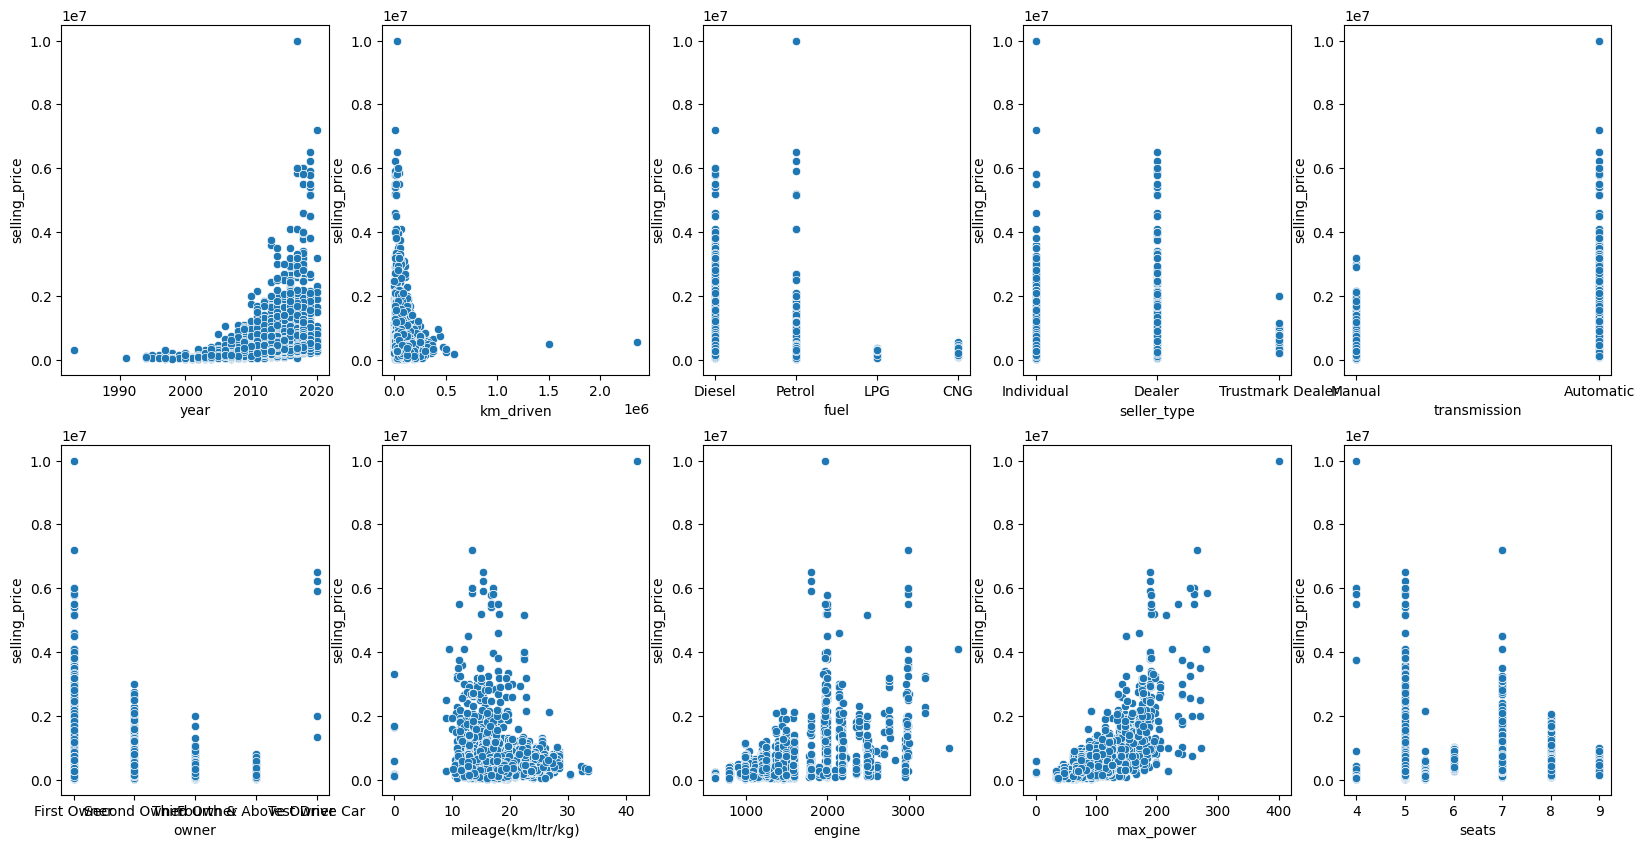

In [141]:
X = data_new.drop(['selling_price','name'], axis=1)
y = data_new['selling_price']
feature_names = X.columns
feature_names = list(feature_names)
fig, axs = plt.subplots(nrows=2, ncols=5)
fig.set_figheight(10)
fig.set_figwidth(20)
sb.scatterplot(x=feature_names[0], y='selling_price', data=data_new, ax=axs[0][0])
sb.scatterplot(x=feature_names[1], y='selling_price', data=data_new, ax=axs[0][1])
sb.scatterplot(x=feature_names[2], y='selling_price', data=data_new, ax=axs[0][2])
sb.scatterplot(x=feature_names[3], y='selling_price', data=data_new, ax=axs[0][3])
sb.scatterplot(x=feature_names[4], y='selling_price', data=data_new, ax=axs[0][4])
sb.scatterplot(x=feature_names[5], y='selling_price', data=data_new, ax=axs[1][0])
sb.scatterplot(x=feature_names[6], y='selling_price', data=data_new, ax=axs[1][1])
sb.scatterplot(x=feature_names[7], y='selling_price', data=data_new, ax=axs[1][2])
sb.scatterplot(x=feature_names[8], y='selling_price', data=data_new, ax=axs[1][3])
sb.scatterplot(x=feature_names[9], y='selling_price', data=data_new, ax=axs[1][4])

## Матрица корреляции

<Axes: >

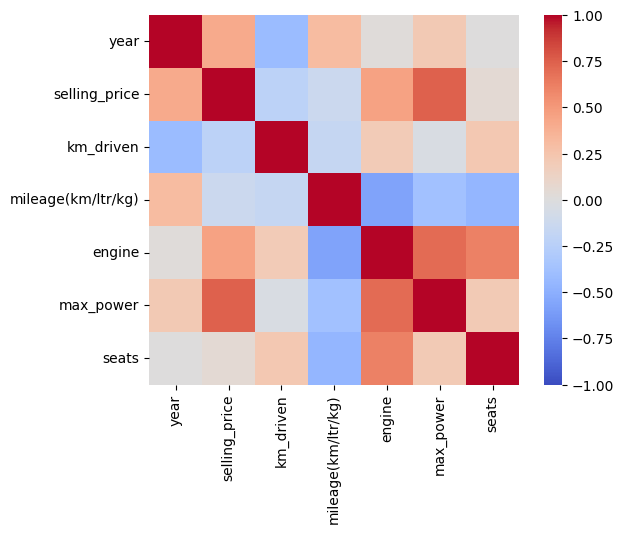

In [142]:
corr_mat = data_new.corr(numeric_only=True)
sb.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')

По матрице корреляции видно, что присутствует очевидная зависимость между признаками. Например, от увеличения мощности двигателя растет и цена машины. 

In [143]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)

enc.fit(X[['fuel', 'seller_type', 'transmission', 'owner']])
dummies = pd.DataFrame(enc.transform(X[['fuel', 'seller_type', 'transmission', 'owner']]),
                       columns=enc.get_feature_names_out(), index=X.index)

X = pd.concat((X, dummies), axis=1).drop(['fuel', 'seller_type', 'transmission', 'owner'], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X= pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)
X.head()
X.describe()

,year,km_driven,mileage(km/ltr/kg),engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
count,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03
mean,2.566579e-14,8.415014e-17,-6.539167e-16,-2.866364e-16,1.735597e-16,-2.296598e-16,-1.402502e-17,1.577815e-17,-5.872978e-17,1.051877e-17,8.415014e-17,-1.384971e-16,2.805005e-17,-1.051877e-17,-2.191410e-17,5.829150e-17,-5.916807e-17,-2.629692e-17,2.016097e-17
std,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00
min,-7.628775e+00,-1.234034e+00,-4.904745e+00,-1.680512e+00,-2.588291e+00,-1.536775e+00,-8.415239e-02,-1.084216e+00,-6.862919e-02,-9.007756e-01,-4.016442e-01,-2.225206e+00,-1.731684e-01,-2.592296e+00,-1.365027e+00,-1.476741e-01,-5.911224e-01,-2.484367e-02,-2.708469e-01
25%,-6.959187e-01,-6.143487e-01,-6.657902e-01,-5.233458e-01,-6.632384e-01,-4.435768e-01,-8.415239e-02,-1.084216e+00,-6.862919e-02,-9.007756e-01,-4.016442e-01,4.493966e-01,-1.731684e-01,3.857584e-01,-1.365027e+00,-1.476741e-01,-5.911224e-01,-2.484367e-02,-2.708469e-01
50%,2.944894e-01,-1.717033e-01,-5.022196e-03,-4.203519e-01,-2.392179e-01,-4.435768e-01,-8.415239e-02,9.223258e-01,-6.862919e-02,-9.007756e-01,-4.016442e-01,4.493966e-01,-1.731684e-01,3.857584e-01,7.325861e-01,-1.476741e-01,-5.911224e-01,-2.484367e-02,-2.708469e-01
75%,7.896935e-01,4.834118e-01,7.219627e-01,2.541569e-01,2.950478e-01,-4.435768e-01,-8.415239e-02,9.223258e-01,-6.862919e-02,1.110154e+00,-4.016442e-01,4.493966e-01,-1.731684e-01,3.857584e-01,7.325861e-01,-1.476741e-01,1.691697e+00,-2.484367e-02,-2.708469e-01
max,1.532500e+00,4.055976e+01,5.692641e+00,4.337561e+00,8.718920e+00,3.929217e+00,1.188320e+01,9.223258e-01,1.457106e+01,1.110154e+00,2.489766e+00,4.493966e-01,5.774726e+00,3.857584e-01,7.325861e-01,6.771668e+00,1.691697e+00,4.025171e+01,3.692123e+00


In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(6079, 2027)

## Линейная регрессия

In [145]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
model.coef_
y_train
y_train_predict
RSS = ((y_train_predict - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

(210467017062.64706, 458766.8439007412)

In [146]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(210467017062.64706, 192186333501.7434, 0.6876374743593192, 0.6707965415311974)

In [147]:
model.score(X_train, y_train)

0.6876374743593192

In [148]:
model.score(X_test, y_test)
MSE_train = ((y_train_predict - y_train)**2).mean()
MSE_test  = ((y_test_predict - y_test)**2).mean()
MSE_train, MSE_test
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['Linear Regression, all features', :] = (RMSE_train, RMSE_test)
RMSE_table
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['Linear Regression, all features', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.687637,0.670797


## KNN

In [149]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=7) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
RMSE_table.loc['k Nearest Neighbours', :] = (RMSE_train, RMSE_test)
RMSE_table
R2_table.loc['k Nearest Neighbours', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.687637,0.670797
k Nearest Neighbours,0.947604,0.926376


## Полносвязная нейронная сеть

In [150]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(20,10))
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
RMSE_table.loc['Neural Network', :] = (RMSE_train, RMSE_test)
RMSE_table
R2_table.loc['Neural Network', :] = (R2_train, R2_test)
R2_table

/home/ismukhin/miniconda3/envs/dl-benchmark-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,train,test
"Linear Regression, all features",0.687637,0.670797
k Nearest Neighbours,0.947604,0.926376
Neural Network,0.27048,0.271463


## Случайный лес

In [151]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
RMSE_table.loc['Random Forest', :] = (RMSE_train, RMSE_test)
RMSE_table
R2_table.loc['Random Forest', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.687637,0.670797
k Nearest Neighbours,0.947604,0.926376
Neural Network,0.27048,0.271463
Random Forest,0.994908,0.968949


<Axes: xlabel='None', ylabel='None'>

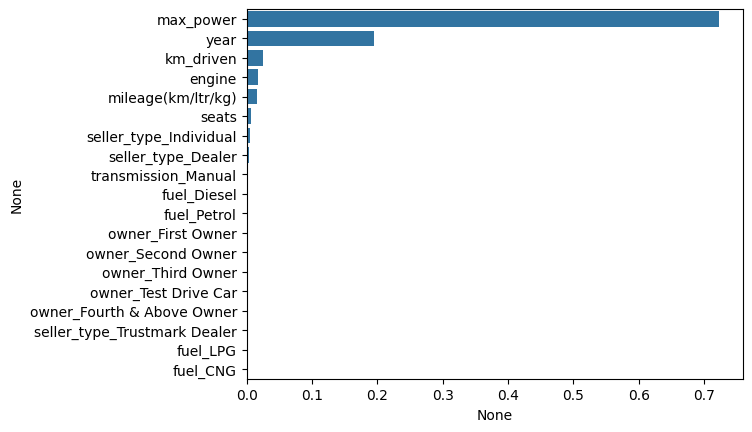

In [152]:
importances = model.feature_importances_
importances
np.sum(importances)
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances
sb.barplot(y=importances.index, x=importances, orient="h")

## Градиентный бустинг

                                    train      test
Linear Regression, all features  0.687637  0.670797
k Nearest Neighbours             0.947604  0.926376
Neural Network                    0.27048  0.271463
Random Forest                    0.994908  0.968949
Gradient Boosting                0.980489  0.960524


<Axes: xlabel='None', ylabel='None'>

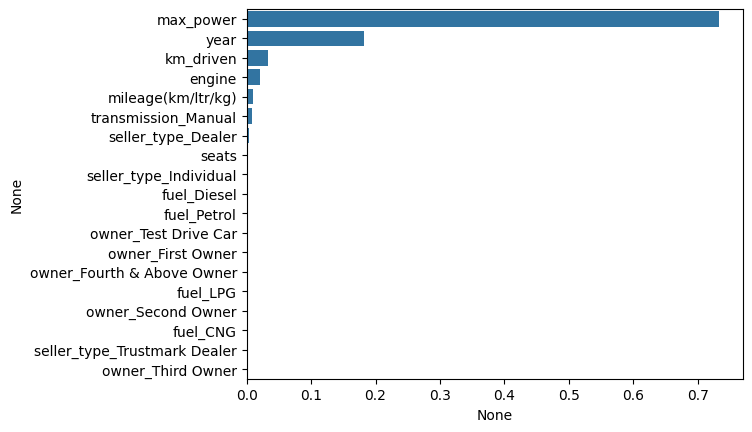

In [153]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
RMSE_table.loc['Gradient Boosting', :] = (RMSE_train, RMSE_test)
RMSE_table
R2_table.loc['Gradient Boosting', :] = (R2_train, R2_test)
 
importances = model.feature_importances_
importances
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances
print(R2_table)
sb.barplot(y=importances.index, x=importances, orient="h")

## Вывод


Лучшие результаты показала модель, построенная с помощью алгоритма `RandomForest`, а худшие результаты показали полносвязанная нейронная сеть (`NeuralNetwork`) и линейная регрессия (`Linear Regression`). Плохие показатели нейронной сети можно обосновать малым количеством нейронов на слоях, модель просто не аппроксимировала целевую функцию. Плохие результаты линейной регрессии можно объяснить нелинейной зависимостью целевого признака(`selling_price`) от всех остальных признаков. 